In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from xgboost import XGBClassifier
import pickle
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

%matplotlib inline

In [2]:
df = pd.read_csv("./Data/Data.csv")
print(df.shape)
df.head()

(250000, 33)


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,9.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [3]:
from sklearn.model_selection import train_test_split

# Assuming 'target' is your label column
df1, _ = train_test_split(df, test_size=0.40, stratify=df['Label'], random_state=0)

In [4]:
df1.shape

(150000, 33)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 40948 to 38406
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      150000 non-null  int64  
 1   DER_mass_MMC                 150000 non-null  float64
 2   DER_mass_transverse_met_lep  150000 non-null  float64
 3   DER_mass_vis                 150000 non-null  float64
 4   DER_pt_h                     150000 non-null  float64
 5   DER_deltaeta_jet_jet         150000 non-null  float64
 6   DER_mass_jet_jet             150000 non-null  float64
 7   DER_prodeta_jet_jet          150000 non-null  float64
 8   DER_deltar_tau_lep           150000 non-null  float64
 9   DER_pt_tot                   150000 non-null  float64
 10  DER_sum_pt                   150000 non-null  float64
 11  DER_pt_ratio_lep_tau         150000 non-null  float64
 12  DER_met_phi_centrality       150000 non-null  float64
 13  D

In [6]:
df1.drop(columns=['EventId'],axis=1,inplace=True)

In [7]:
df1.replace(-999.0, np.nan, inplace=True)

In [8]:
features_with_na = [features for features in df1.columns if df1[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,round(df1[feature].isnull().mean()*100),'% missing values')

DER_mass_MMC 15 % missing values
DER_deltaeta_jet_jet 71 % missing values
DER_mass_jet_jet 71 % missing values
DER_prodeta_jet_jet 71 % missing values
DER_lep_eta_centrality 71 % missing values
PRI_jet_leading_pt 40 % missing values
PRI_jet_leading_eta 40 % missing values
PRI_jet_leading_phi 40 % missing values
PRI_jet_subleading_pt 71 % missing values
PRI_jet_subleading_eta 71 % missing values
PRI_jet_subleading_phi 71 % missing values


In [9]:
df1.drop(columns=['DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 
                 'DER_lep_eta_centrality', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 
                 'PRI_jet_subleading_phi'], inplace=True)

In [10]:
df1['Label'] = df1['Label'].replace({'b': 0, 's': 1})

In [11]:
df1['DER_mass_MMC'].fillna(df1['DER_mass_MMC'].median(), inplace=True)
df1['PRI_jet_leading_pt'].fillna(df1['PRI_jet_leading_pt'].median(), inplace=True)
df1['PRI_jet_leading_eta'].fillna(df1['PRI_jet_leading_eta'].median(), inplace=True)
df1['PRI_jet_leading_phi'].fillna(df1['PRI_jet_leading_phi'].median(), inplace=True)

In [12]:
num_cols = [cols for cols in df1.columns if df1[cols].dtype != 'O']
cat_cols = [cols for cols in df1.columns if df1[cols].dtype == 'O']

print(f"We have {len(num_cols)} numeric features which are : {num_cols}\n" )
print(f"We have {len(cat_cols)} categorical features which are : {cat_cols} " )

We have 25 numeric features which are : ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_all_pt', 'Weight', 'Label']

We have 0 categorical features which are : [] 


In [13]:
num_cols = ['DER_mass_MMC',
 'DER_mass_transverse_met_lep',
 'DER_mass_vis',
 'DER_pt_h',
 'DER_deltar_tau_lep',
 'DER_pt_tot',
 'DER_sum_pt',
 'DER_pt_ratio_lep_tau',
 'DER_met_phi_centrality',
 'PRI_tau_pt',
 'PRI_tau_eta',
 'PRI_tau_phi',
 'PRI_lep_pt',
 'PRI_lep_eta',
 'PRI_lep_phi',
 'PRI_met',
 'PRI_met_phi',
 'PRI_met_sumet',
 'PRI_jet_num',
 'PRI_jet_leading_pt',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi',
 'Weight']

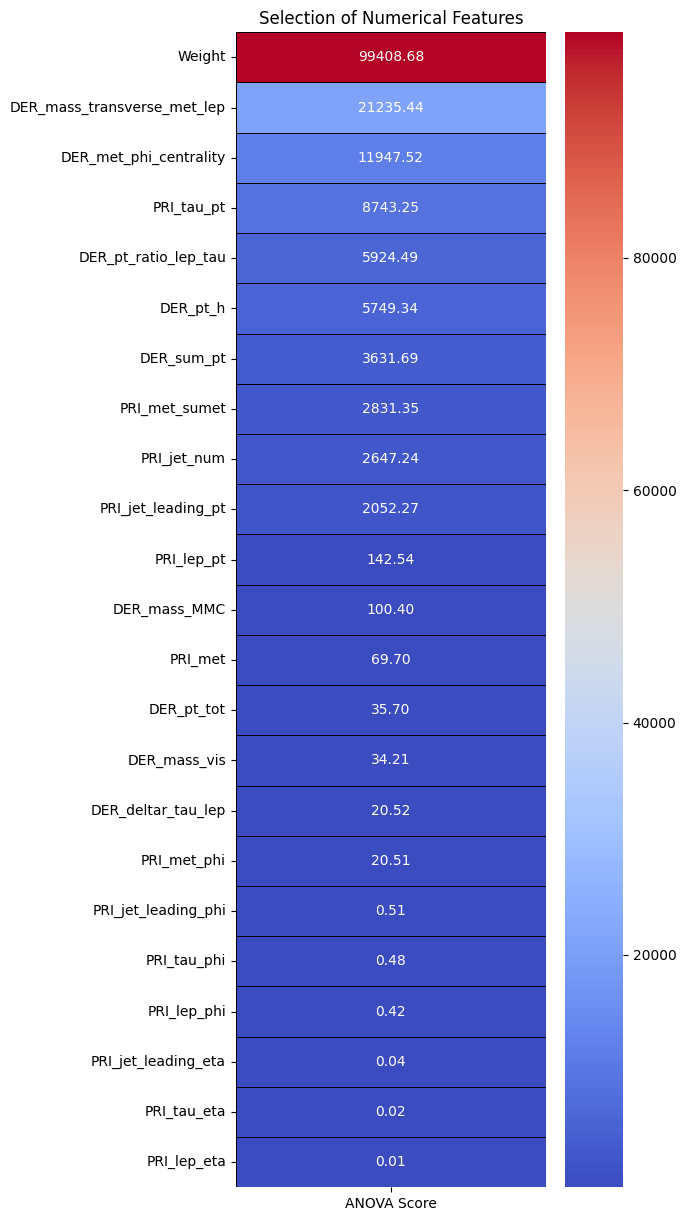

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
features = df1.loc[:,num_cols]
target = df1.loc[:,'Label']

best_features = SelectKBest(score_func = f_classif, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_, index= list(features.columns),
                             columns = ['ANOVA Score'])

plt.subplots(figsize=(5,15))
sns.heatmap(featureScores.sort_values(ascending = False, by = 'ANOVA Score'),
            annot=True, cmap = 'coolwarm', linewidths = 0.4, linecolor = 'black', fmt = '.2f')
plt.title('Selection of Numerical Features')
plt.show()

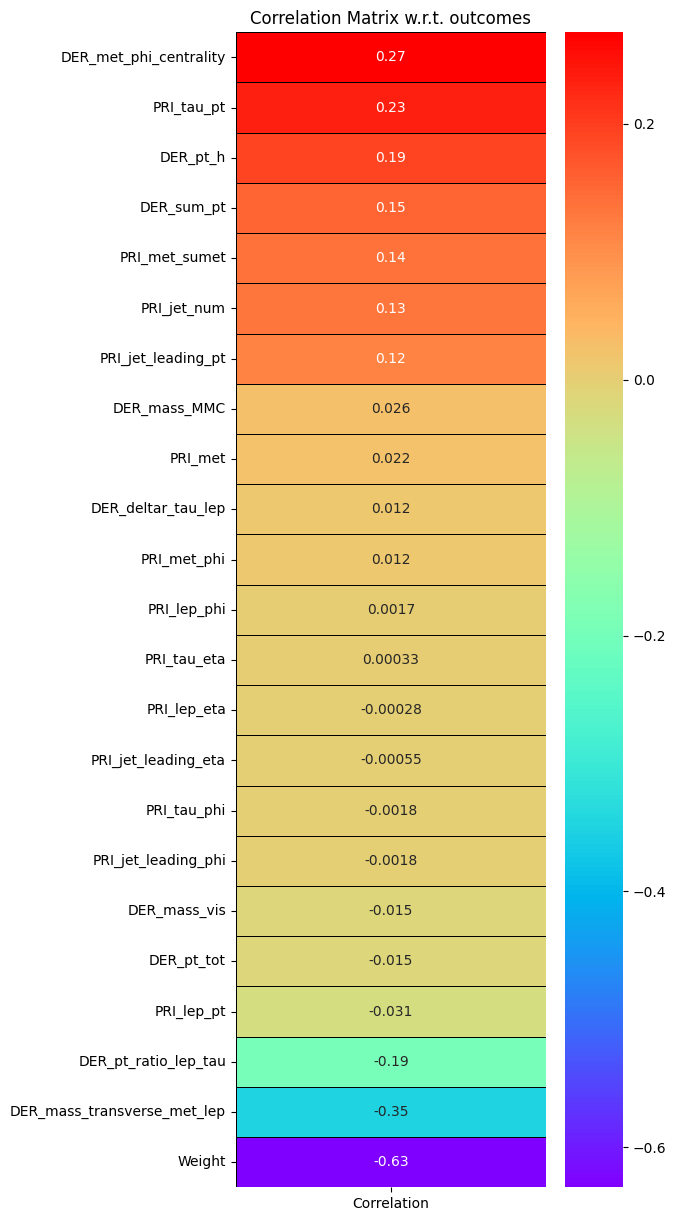

In [15]:
corr = df1[num_cols].corrwith(df1['Label']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
plt.subplots(figsize = (5,15))
sns.heatmap(corr, annot=True, cmap='rainbow', linewidths = 0.4, linecolor='black')
plt.title("Correlation Matrix w.r.t. outcomes")
plt.show()

In [16]:
df1.drop(columns=[ 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi','PRI_tau_phi','PRI_lep_phi','PRI_tau_eta','PRI_lep_eta'],inplace=True,axis=1)

In [17]:
df1.drop(columns=[ 'DER_sum_pt',
 'PRI_jet_all_pt','Weight'],inplace=True,axis=1)

In [18]:
num_cols = [cols for cols in df1.columns if df1[cols].dtype != 'O']

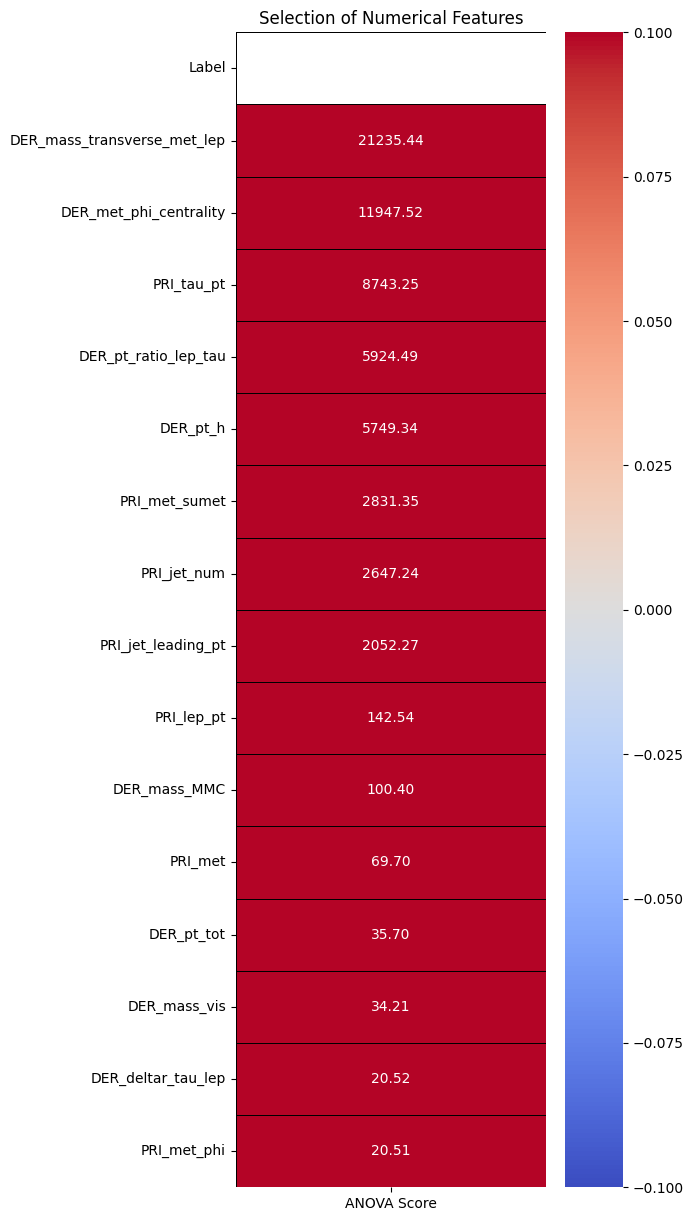

In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
features = df1.loc[:,num_cols]
target = df1.loc[:,'Label']

best_features = SelectKBest(score_func = f_classif, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data = fit.scores_, index= list(features.columns),
                             columns = ['ANOVA Score'])

plt.subplots(figsize=(5,15))
sns.heatmap(featureScores.sort_values(ascending = False, by = 'ANOVA Score'),
            annot=True, cmap = 'coolwarm', linewidths = 0.4, linecolor = 'black', fmt = '.2f')
plt.title('Selection of Numerical Features')
plt.show()

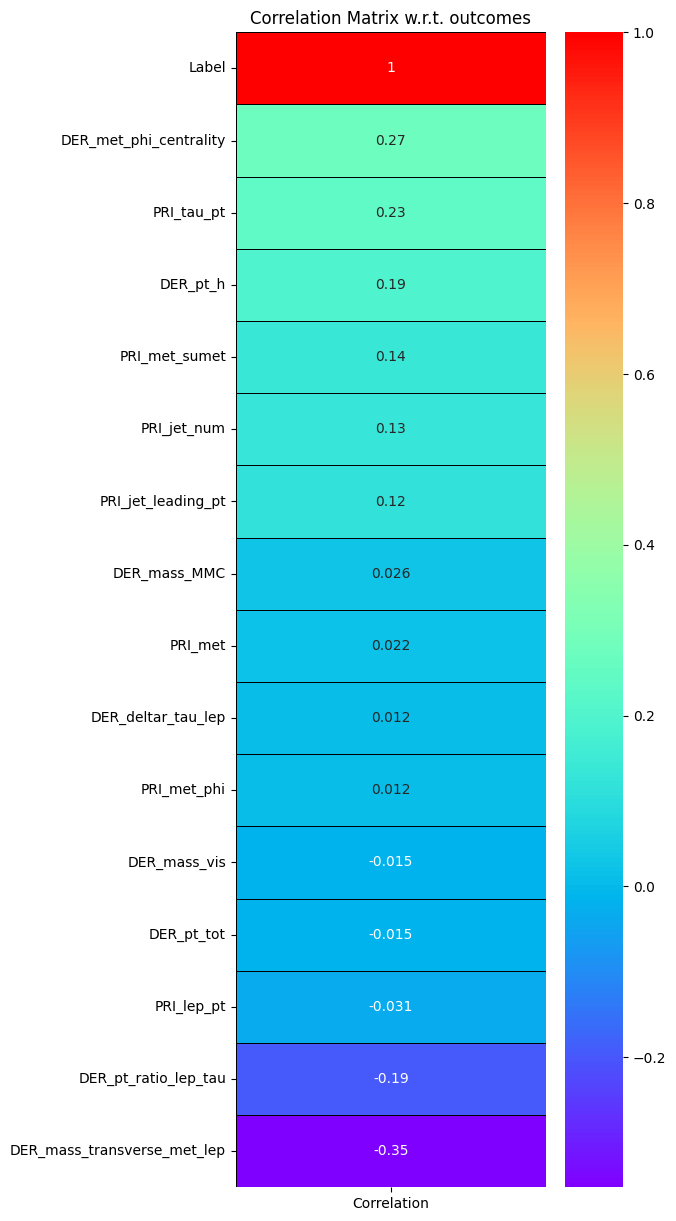

In [20]:
corr = df1[num_cols].corrwith(df1['Label']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
plt.subplots(figsize = (5,15))
sns.heatmap(corr, annot=True, cmap='rainbow', linewidths = 0.4, linecolor='black')
plt.title("Correlation Matrix w.r.t. outcomes")
plt.show()

In [21]:
x = df1.drop(['Label'], axis=1)
y = df1['Label']

In [22]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=11)
x_new, y_new = sm.fit_resample(x,y)

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,stratify=y_new,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(157760, 15)
(39440, 15)
(157760,)
(39440,)


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score, recall_score, f1_score, roc_auc_score,roc_curve
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [26]:
models = {
    "Random Forest":RandomForestClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "Gradient Boosting":GradientBoostingClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Logistic Regression":LogisticRegression(),
    "K-Neighbors Classifier":KNeighborsClassifier(),
    #"Support Vector Classifier":SVC(),
    "XGBClassifier":XGBClassifier(),
    "CatBoosting Classifier":CatBoostClassifier(verbose=False)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)
    
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    #training set
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred, average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train,y_train_pred)
    
    #test set
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print("model performance for training set")
    print(f"Accuracy:{model_train_accuracy:.4f}")
    print(f"F1 Score:{model_train_f1:.4f}")
    print(f"precision:{model_train_precision:.4f}")
    print(f"recall:{model_train_recall:.4f}")
    print(f"Roc Auc Score:{model_train_rocauc_score:.4f}")
    
    print("-"*35)
    
    print("model performance for test set")
    print(f"Accuracy:{model_test_accuracy:.4f}")
    print(f"F1 Score:{model_test_f1:.4f}")
    print(f"precision:{model_test_precision:.4f}")
    print(f"recall:{model_test_recall:.4f}")
    print(f"Roc Auc Score:{model_test_rocauc_score:.4f}")
    
    print("="*35)
    print('\n')

Random Forest
model performance for training set
Accuracy:1.0000
F1 Score:1.0000
precision:1.0000
recall:1.0000
Roc Auc Score:1.0000
-----------------------------------
model performance for test set
Accuracy:0.8595
F1 Score:0.8595
precision:0.8498
recall:0.8733
Roc Auc Score:0.8595


Decision Tree
model performance for training set
Accuracy:1.0000
F1 Score:1.0000
precision:1.0000
recall:1.0000
Roc Auc Score:1.0000
-----------------------------------
model performance for test set
Accuracy:0.7885
F1 Score:0.7885
precision:0.7826
recall:0.7989
Roc Auc Score:0.7885


Gradient Boosting
model performance for training set
Accuracy:0.8186
F1 Score:0.8186
precision:0.8151
recall:0.8243
Roc Auc Score:0.8186
-----------------------------------
model performance for test set
Accuracy:0.8180
F1 Score:0.8180
precision:0.8150
recall:0.8229
Roc Auc Score:0.8180


AdaBoost Classifier
model performance for training set
Accuracy:0.7936
F1 Score:0.7935
precision:0.7829
recall:0.8125
Roc Auc Score:0.7936

In [27]:
knn_params = {"n_neighbors":[2,3,10,20,40,50],
             'metric':['minkowski','manhattan']}
rf_params = {''
              'max_depth': [5, 15, 4,6,8,21],
              'max_features': ['log2', 'sqrt'],
              'criterion': ['gini', 'entropy'],
             'n_estimators':[100,200,400,1000]}
xgboost_params = {"learning_rate": [0.1,0.01],
                  'n_estimators':[100,200,300],
                  "colsample_bytree":[0.5,0.8,1,0.3,0.4]}
cat_params = {"learning_rate": [0.1,0.01],
             'max_depth': [5, 15, 4,6,8]}

In [28]:
randomcv_models = [('KNN',KNeighborsClassifier(), knn_params),
                  ('RF',RandomForestClassifier(), rf_params),
                  ('XGBoost',XGBClassifier() , xgboost_params),
                  ('CatBoost',CatBoostClassifier(verbose=False), cat_params)]

In [29]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=5,verbose=2,n_jobs=-1)
    random.fit(x_train,y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} ------------")
    print(model_param[model_name])

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
---------------- Best Params for KNN ------------
{'n_neighbors': 10, 'metric': 'manhattan'}
---------------- Best Params for RF ------------
{'n_estimators': 1000, 'max_features': 'log2', 'max_depth': 21, 'criterion': 'gini'}
---------------- Best Params for XGBoost ------------
{'n_estimators': 300, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
---------------- Best Params for CatBoost ------------
{'max_depth': 15, 'learning_rate': 0.1}
